# Canny Edge Demo

Reference: https://scikit-image.org/docs/stable/auto_examples/edges/plot_canny.html

skimage.feature.canny()

In [1]:
import matplotlib.pyplot as plt
from skimage import io, feature, color
from PIL import Image
import os
import zipfile
from skimage import io, feature, color, img_as_ubyte, util

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

# Change to the directory where the images are stored
# os.chdir('/content/drive/MyDrive/')
os.chdir('/content/drive/MyDrive/')

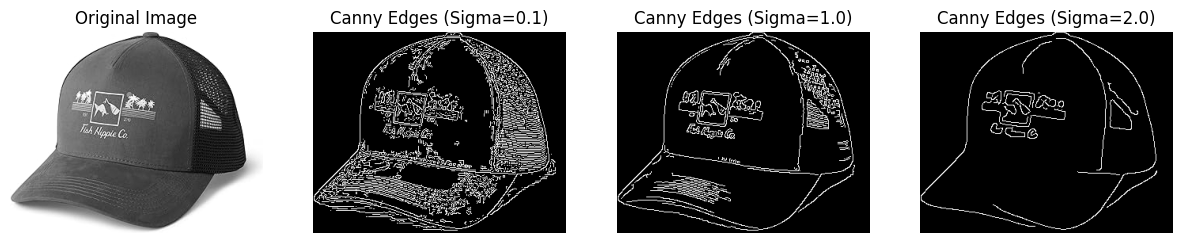

In [ ]:
# Load the image
img = io.imread(image_path)

# Convert the image to grayscale
gray_img = color.rgb2gray(img)

# List of sigma values to compare
sigma_values = [0.1, 1.0, 2.0]

# Display the original image and Canny edges for different sigma values
fig, axes = plt.subplots(nrows=1, ncols=len(sigma_values) + 1, figsize=(15, 5))

# Display the original image
axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display Canny edges for different sigma values
for i, sigma in enumerate(sigma_values, 1):
    edges = feature.canny(gray_img, sigma=sigma)
    edges = util.invert(edges)

    axes[i].imshow(edges, cmap='gray')
    axes[i].set_title(f'Canny Edges (Sigma={sigma})')
    axes[i].axis('off')

plt.show()

In [ ]:
def apply_canny(image, sigma):
    gray_img = color.rgb2gray(image)
    edges = feature.canny(gray_img, sigma=sigma)
    return util.invert(edges)

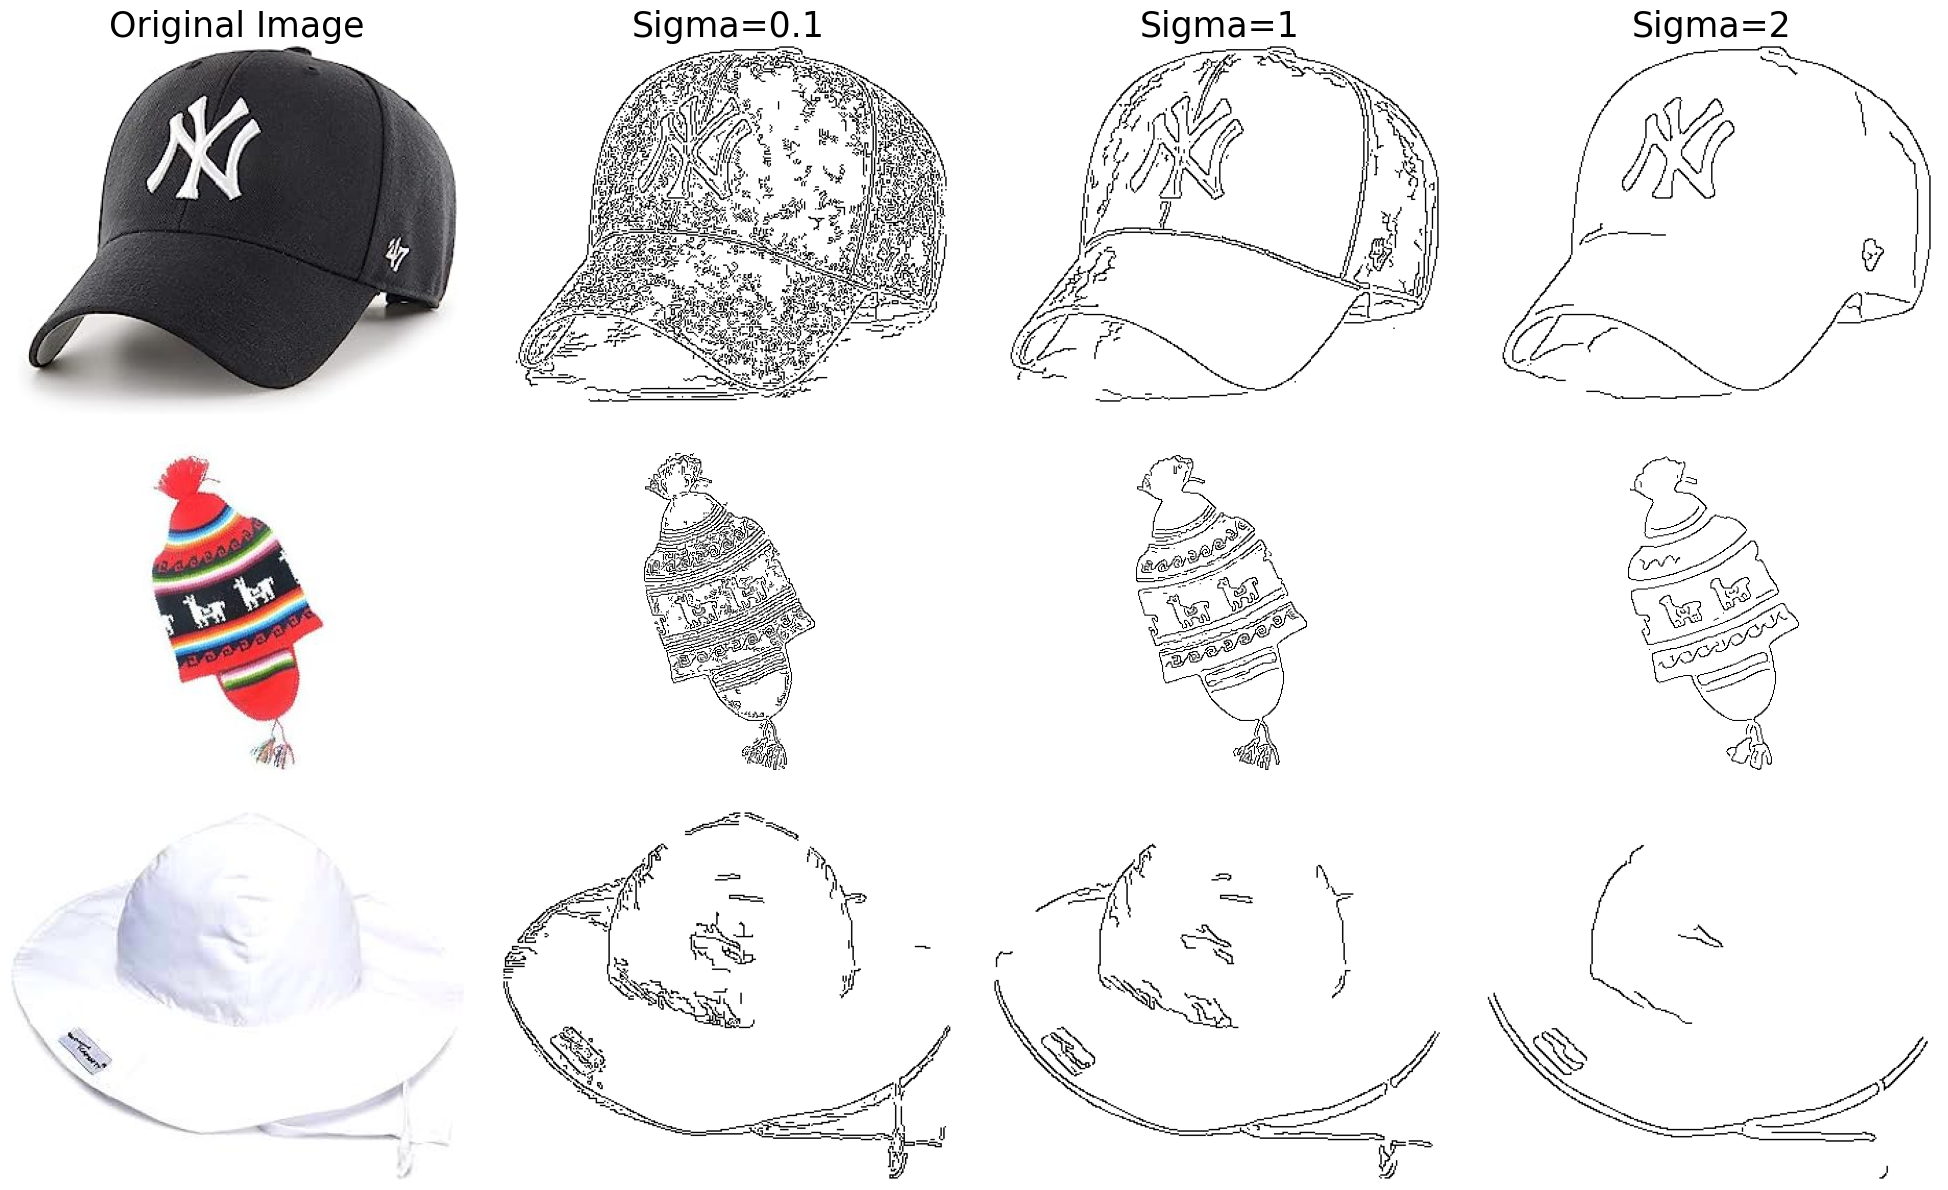

In [ ]:
# Load the images
img0 = io.imread('img0.jpg')
img1 = io.imread('img1.jpg')
img2 = io.imread('img2.jpg')
images = [img0, img1, img2]

# List of sigma values for Canny edge detection
sigmas = [0.1, 1, 2]

# Convert the images to grayscale as Canny edge detection requires grayscale images
img0_gray = color.rgb2gray(img0)
img1_gray = color.rgb2gray(img1)
img2_gray = color.rgb2gray(img2)

# Apply Canny edge detection with different sigma values and invert the edges for visualization
# Creating a 3x3 grid of images
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))  # Adjusted the figure size to be wider

# Remove the gaps between subplots
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# Set column titles for the first row only
axes[0, 0].set_title("Original Image",fontsize=25)
for i, sigma in enumerate(sigmas, start=1):
    axes[0, i].set_title(f"Sigma={sigma}",fontsize=25)

# Populate the grid with original images in the first column
for i, image in enumerate(images):
    axes[i, 0].imshow(image, cmap='gray')  # Displaying placeholder images in grayscale
    axes[i, 0].axis('off')

# Apply Canny edge detection and populate the grid for the rest of the columns
for row, image in enumerate([img0_gray, img1_gray, img2_gray]):  # Use grayscale images for edge detection
    for col, sigma in enumerate(sigmas, start=1):  # Start at 1 to skip the first column
        edges = feature.canny(image, sigma=sigma)
        inverted_edges = util.invert(edges)
        ax = axes[row, col]
        ax.imshow(inverted_edges, cmap='gray')
        ax.axis('off')

# Tight layout to reduce spacing
plt.tight_layout()
plt.show()

sigma param is at 1 defaultly; the larger it is (~ >2.0), the model detects broader edges, the smaller it is, we get more detailed edges

through repeated testing, sigma=2.0 better suits the complexity of our expected inputs, which are likely hand-drawn sketches from target users.


to standardize the data to have white background, use the function util.invert(output_from_canny):

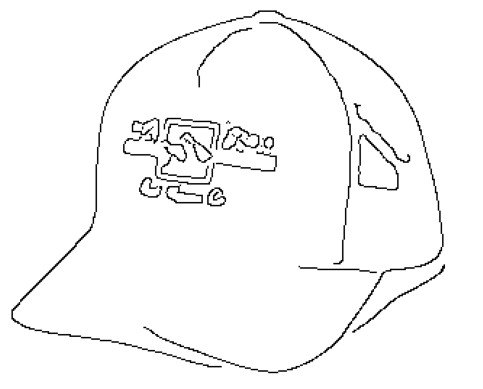

In [ ]:
# Invert colors
edges = feature.canny(gray_img, sigma=sigma)
inverted_edges = util.invert(edges)

plt.imshow(inverted_edges, cmap='gray')
plt.axis('off')
plt.show()

# Batch Processing

In [ ]:
import os
from zipfile import ZipFile
import skimage.io as io
from skimage import feature, util, img_as_ubyte
import numpy as np

In [ ]:
# Function to apply Canny edge detection to an image
def apply_canny(image):
    # Convert image to grayscale if it's not already
    if len(image.shape) == 3 and image.shape[2] == 3:
        image_gray = color.rgb2gray(image)
    else:
        image_gray = image  # Assuming image is already grayscale
    # Apply Canny edge detection
    edges = feature.canny(image_gray)
    return edges

In [ ]:
# Directory containing uncompressed images
input_dir = 'hat_result_new_manipulated.zip'
output_dir = 'edges_hat_new'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
input_zip_path = 'hat_result_new_manipulated.zip'
output_dir ='/content/drive/MyDrive/INDENG243/Module_1/edges_hat_new'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

with ZipFile(input_zip_path, 'r') as zip_ref:
    # List of image extensions to process
    valid_extensions = ('.jpg', '.jpeg', '.png')
    # Get list of image files in the zip
    image_files = [f for f in zip_ref.namelist() if f.endswith(valid_extensions)]

    for idx, filename in enumerate(image_files):
        # Read the image file from the zip
        with zip_ref.open(filename, 'r') as img_file:
            img = io.imread(img_file)

            # Apply Canny edge detection; invert to white background
            edges = apply_canny(img)
            edges = util.invert(edges)

            # Convert boolean image to 8-bit unsigned integer image to avoid error
            edges = img_as_ubyte(edges)

            # Save processed image to the output directory
            output_filename = f"{os.path.splitext(filename)[0]}.png"
            output_path = os.path.join(output_dir, output_filename)
            io.imsave(output_path, edges)

            print(f"Processed image {idx + 1}/{len(image_files)}: {filename}")

print("Batch processing complete.")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Iterate through images, apply Canny, and save processed images
for idx, filename in enumerate(os.listdir(input_dir)):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
        # Read the image
        img_path = os.path.join(input_dir, filename)
        img = io.imread(img_path)

        # Apply Canny edge detection; invert to white background
        edges = apply_canny(img)
        edges = util.invert(edges)

        # Convert boolean image to 8-bit unsigned integer image to avoid error
        edges = img_as_ubyte(edges)

        # Save processed image to the output directory
        output_filename = f"{os.path.splitext(filename)[0]}_edges.png"
        output_path = os.path.join(output_dir, output_filename)
        io.imsave(output_path, edges)

        print(f"Processed image {idx + 1}/{len(os.listdir(input_dir))}: {filename}")

print("Batch processing complete.")


NotADirectoryError: [Errno 20] Not a directory: 'hat_result_new_manipulated.zip'